# <span style="color:black"> LSN-Esercitazione numerica 4</span>


Nella seguente esercitazione si è simulata la dinamica molecolare di particelle poste in un reticolo cristallino con condizioni periodiche al contorno, attraverso il calcolo di un potenziale di tipo Lennard-Jones:
$$V_{LJ}(R)=4\epsilon\left[\left(\frac{\sigma}{R}\right)^{12}-\left(\frac{\sigma}{R}\right)^{6}\right].$$

Tutte le grandezze termodinamiche, nella simulazione, sono espresse in unità ridotte. In particolare si è utilizzato l'algoritmo di Verlet per integrare le equazioni del moto.

## <span style="color:blue">  Esercizio 04.1</span>

Le simulazioni richiedono una fase di equilibrazione del sistema: la configurazione iniziale, in particolare, è quella di minima energia potenziale, per cui per simulare la dinamica è necessario "fornire" energia al sistema per portarlo alla temperatura richiesta.
Ho implemenatato la possibilità di inziare la nuova simulazione dalla configurazione finale della simulazione precendete attraverso una variabile $restart$ letta nel file di input: se essa è pari a 1 le configurazioni inziali lette non sono quelle del file <font face="Courier">config.0</font>, ma quelle di <font face="Courier">config.final</font>: la simualzione legge anche le posizioni al tempo $t-dt$, salvate nel file <font face="Courier">old.final</font>.
Ho inoltre prodotto dei file di output delle grandezze termodinamiche studiate istantaneamente per poter studiare le condizioni di equilibrazione.
Nel caso di ripartenza ho implementato la lettura delle posizioni attuali e precedenti, il calcolo del nuovo step con l'algoritmo di Verlet e delle relative velocità, l'utilizzo delle velocità per il calcolo della temperatura attuale, il riscalamento delle velocità per un fattore di scala $f_s=\sqrt\frac{T_{attesa}}{T_{attuale}}$ e la stima delle posizioni al tempo $t-dt$ con le velocità riscalate.

Ho simulato una configurazione solida a $T^{*}=1.4$ attraverso più simulazoni ognuna di 5000 steps con condizione iniziale $restart=0$ per la prima, e $restart=1$ per le successive. Si nota come, la temperatura oscilla attorno al valore target messo in input solo dopo 5 ripartenze (25000 steps): da quel momento in avanti il sistema è equilibrato.

I bruschi salti di temperatura presenti in modo più vistoso nelle prime simulazioni sono dovuti al calcolo naive delle coordinate $x_{old}$, $y_{old}$ e $z_{old}$ nella fase di input.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
T = np.loadtxt('./Equi/output_temp.dat', usecols=(0), unpack='true')

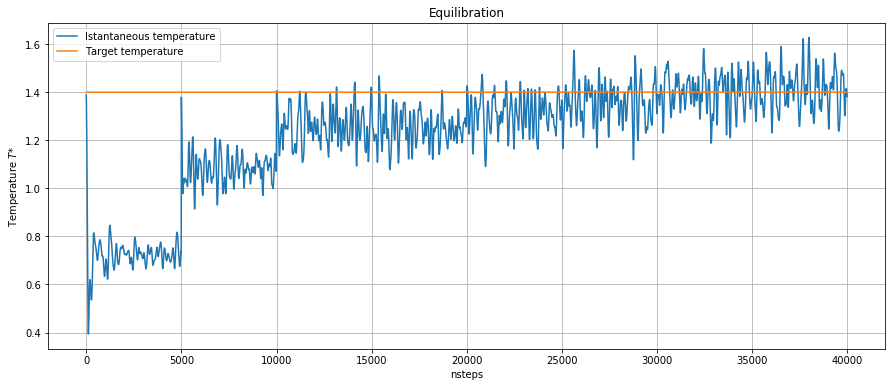

In [3]:
b=np.arange(np.size(T))*10
plt.figure(figsize=(15,6))
plt.plot(b,T, label="Istantaneous temperature" )
plt.plot(b, 1.4+b-b, label="Target temperature")
plt.xlabel("nsteps")
plt.ylabel("Temperature $T{*}$")
plt.grid(True)
plt.legend()
plt.title("Equilibration")
plt.show()

## <span style="color:blue">  Esercizio 04.2</span>

Ho implememtato la media a blocchi per stimare le incertezze di  $E_{tot}/N$, $E_{pot}/N$, $E_{kin}/N$ e $T$. Nell'esercizio successivo ho applicato tale metodo di simulazioni con 50000 steps suddivisi in 50 blocchi di sistemi precedentemente equilibrati.

## <span style="color:blue">  Esercizio 04.3</span>

### Fase solida

Ho simulato lo stato solido dell'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu).

Fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)

Mostro in figura i grafici di eneregia totale per particella, energia cinetica per particella, energia potenziale per particella e temperatura mediati attraverso la media a blocchi in funzione dei blocchi stessi.

Tutte le grandezze termodinamiche (e le incertezze associate), prima di essere plotatte, sono state convertite nelle unità di misura del sistema internazionale, avendo a disposizione il valore di $\epsilon/k_B$ dell'Argon.

$E_{tot}=\epsilon \cdot E_{tot}^*$          
$E_{pot}=\epsilon \cdot E_{pot}^*$             
$E_{kin}=\epsilon \cdot E_{kin}^*$           
$T=\left(\epsilon/k_B\right)T^*$

In [4]:
block, Etot, sigmaEtot = np.loadtxt('./Solid/output_ave_etot.dat', usecols=(0,1,2), unpack='true')
block, Ekin, sigmaEkin = np.loadtxt('./Solid/output_ave_ekin.dat', usecols=(0,1,2), unpack='true')
block, Epot, sigmaEpot = np.loadtxt('./Solid/output_ave_epot.dat', usecols=(0,1,2), unpack='true')
block, temp, sigmatemp = np.loadtxt('./Solid/output_ave_temp.dat', usecols=(0,1,2), unpack='true')
eps_kb=120 #Argon
k=1.380649e-23
eps=eps_kb*k
#SI
temp=temp*eps_kb
sigmatemp=sigmatemp*eps_kb
Etot=Etot*eps
sigmaEtot=sigmaEtot*eps
Ekin=Ekin*eps
sigmaEkin=sigmaEkin*eps
Epot=Epot*eps
sigmaEpot=sigmaEpot*eps


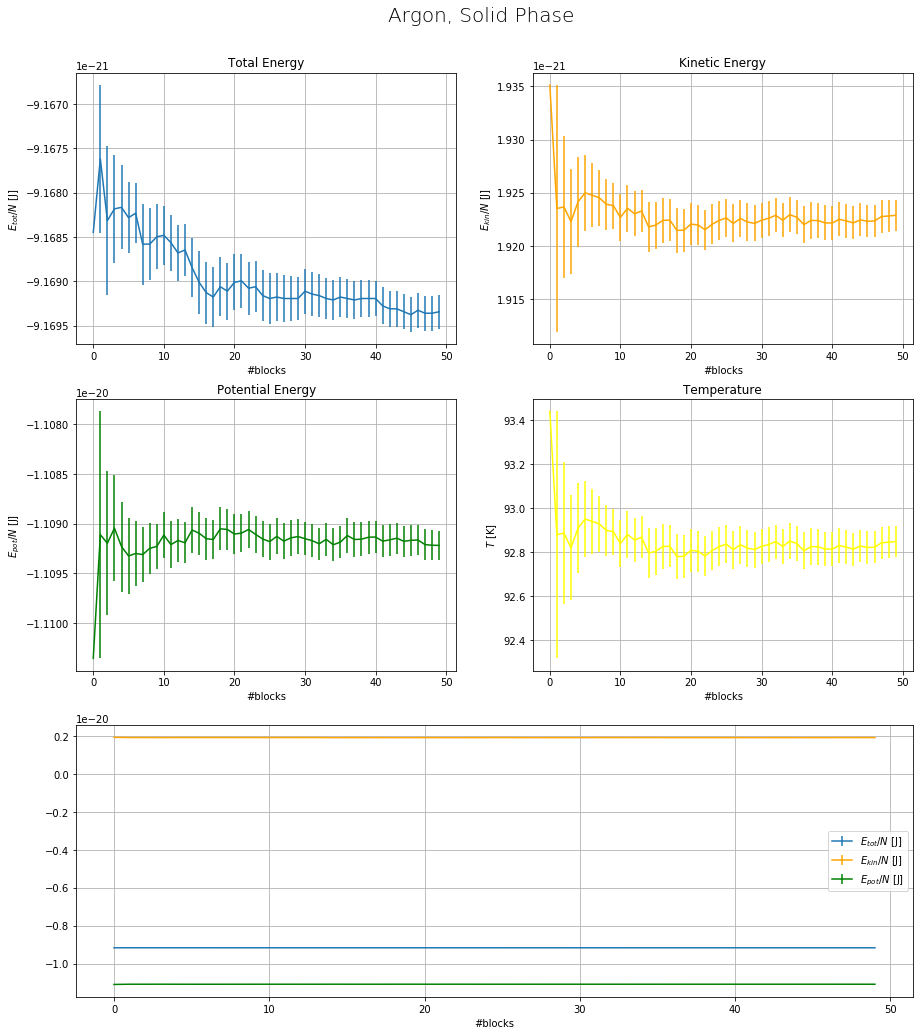

In [5]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 23))
fig.suptitle('Argon, Solid Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(4, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plt.errorbar(block,Etot,yerr=sigmaEtot)
plt.xlabel('#blocks')
plt.ylabel('$E_{tot}/N$ [J]')
plt.title ("Total Energy")
plt.grid(True)

ax2 = fig.add_subplot(gs[0, 1])
plt.errorbar(block,Ekin,yerr=sigmaEkin, color="orange")
plt.xlabel('#blocks')
plt.ylabel('$E_{kin}/N$ [J]')
plt.title ("Kinetic Energy")
plt.grid(True)

ax3 = fig.add_subplot(gs[1, 0])
plt.errorbar(block,Epot,yerr=sigmaEpot , color="green")
plt.xlabel('#blocks')
plt.ylabel('$E_{pot}/N$ [J]')
plt.title ("Potential Energy")
plt.grid(True)

ax4 = fig.add_subplot(gs[1, 1])
plt.errorbar(block,temp,yerr=sigmatemp, color="yellow")
plt.xlabel('#blocks')
plt.ylabel('$T$ [K]')
plt.title ("Temperature")
plt.grid(True)

ax5 = fig.add_subplot(gs[2, :])
plt.errorbar(block,Etot,yerr=sigmaEtot, label="$E_{tot}/N$ [J]")
plt.errorbar(block,Ekin,yerr=sigmaEkin, label="$E_{kin}/N$ [J]",  color="orange")
plt.errorbar(block,Epot,yerr=sigmaEpot, label="$E_{pot}/N$ [J]", color="green")
plt.xlabel('#blocks')
ax5.legend()
plt.grid(True)
plt.show()

Si nota come energia cinetica e temperatura abbiano lo stesso andamento, semplicemente scalato per un opportuno fattore. L'energia cinetica e potenziale presentano un massimo dove l'altra presenta un minimo, e viceversa: questo accade perchè il sistema è microcanonico e l'energia totale è, dunque, costante.
Le fluttuazioni, infatti, presenti nell'energia totale sono su scale del millesimo di Joule.
Il grafico conclusivo mostra quindi come l'algoritmo di Verleet conservi bene l'energia su tempi scala elevati.

Il sistema è legato e osservando i moduli di energia cinetica e potenziale si nota come domini il termine di energia potenziale, mostrando il tipico comportamento di una fase solida.

### Fase liquida

Fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)

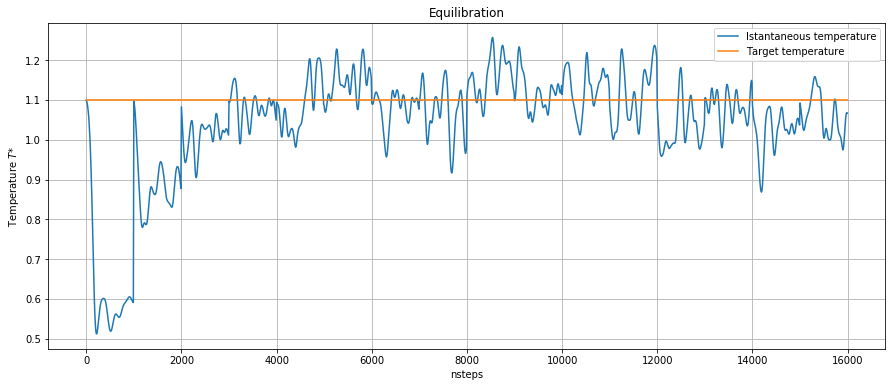

In [6]:
T = np.loadtxt('./Liquid/Equi/output_temp.dat', usecols=(0), unpack='true')
plt.figure(figsize=(15,6))
b=np.arange(np.size(T))*10
plt.plot(b,T, label="Istantaneous temperature" )
plt.plot(b, 1.1+b-b, label="Target temperature")
plt.xlabel("nsteps")
plt.ylabel("Temperature $T{*}$")
plt.grid(True)
plt.legend()
plt.title("Equilibration")
plt.show()

Si è eseguita l'equilibrazione attraverso il susseguirsi di rapide simulazioni di 1000 steps ognuna impostata con $restart=1$. Il sistema risulta equilibrato dopo all'incirca 10000 steps anche se la temperatura oscilla, discostandosi dal valore di target di circa il 10%.

Confrontando l'equilibrazione del solido è da notare come l'equilibrazione avviene in modo più efficacie effettuando più ripartenze con simulazioni brevi: infatti ad ogni ripartenza è presente un salto sempre più piccolo e una successiva fase di oscillazioni con media nulla.

In [7]:
block, Etot, sigmaEtot = np.loadtxt('./Liquid/output_ave_etot.dat', usecols=(0,1,2), unpack='true')
block, Ekin, sigmaEkin = np.loadtxt('./Liquid/output_ave_ekin.dat', usecols=(0,1,2), unpack='true')
block, Epot, sigmaEpot = np.loadtxt('./Liquid/output_ave_epot.dat', usecols=(0,1,2), unpack='true')
block, temp, sigmatemp = np.loadtxt('./Liquid/output_ave_temp.dat', usecols=(0,1,2), unpack='true')
eps_kb=120 #Argon
k=1.380649e-23
eps=eps_kb*k
#SI
temp=temp*eps_kb
sigmatemp=sigmatemp*eps_kb
Etot=Etot*eps
sigmaEtot=sigmaEtot*eps
Ekin=Ekin*eps
sigmaEkin=sigmaEkin*eps
Epot=Epot*eps
sigmaEpot=sigmaEpot*eps


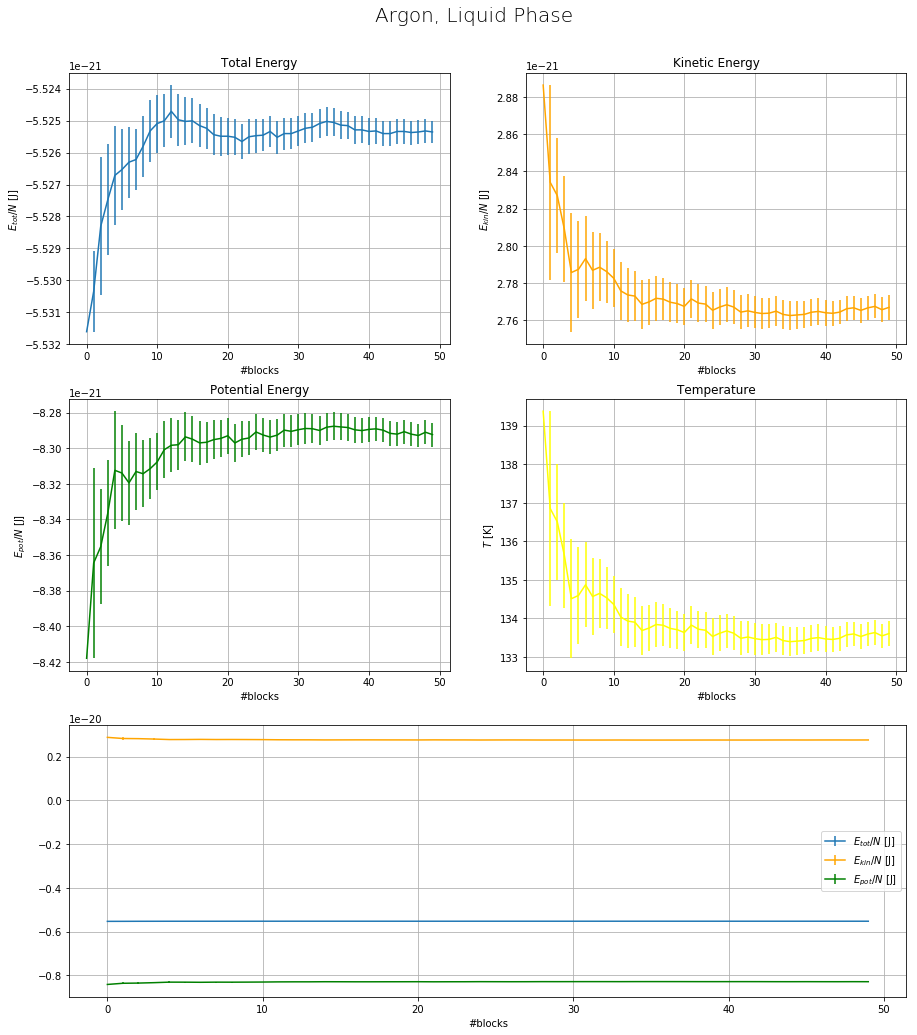

In [8]:
fig = plt.figure(figsize=(15, 23))
fig.suptitle('Argon, Liquid Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(4, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plt.errorbar(block,Etot,yerr=sigmaEtot)
plt.xlabel('#blocks')
plt.ylabel('$E_{tot}/N$ [J]')
plt.title ("Total Energy")
plt.grid(True)

ax2 = fig.add_subplot(gs[0, 1])
plt.errorbar(block,Ekin,yerr=sigmaEkin, color="orange")
plt.xlabel('#blocks')
plt.ylabel('$E_{kin}/N$ [J]')
plt.title ("Kinetic Energy")
plt.grid(True)

ax3 = fig.add_subplot(gs[1, 0])
plt.errorbar(block,Epot,yerr=sigmaEpot , color="green")
plt.xlabel('#blocks')
plt.ylabel('$E_{pot}/N$ [J]')
plt.title ("Potential Energy")
plt.grid(True)

ax4 = fig.add_subplot(gs[1, 1])
plt.errorbar(block,temp,yerr=sigmatemp, color="yellow")
plt.xlabel('#blocks')
plt.ylabel('$T$ [K]')
plt.title ("Temperature")
plt.grid(True)

ax5 = fig.add_subplot(gs[2, :])
plt.errorbar(block,Etot,yerr=sigmaEtot, label="$E_{tot}/N$ [J]")
plt.errorbar(block,Ekin,yerr=sigmaEkin, label="$E_{kin}/N$ [J]",  color="orange")
plt.errorbar(block,Epot,yerr=sigmaEpot, label="$E_{pot}/N$ [J]", color="green")
plt.xlabel('#blocks')
ax5.legend()
plt.grid(True)
plt.show()

Nella fase liquida è ancora dominante la componente potenziale, ma in modo meno marcato rispetto alla fase solida; il sistema è ancora legato.

### Fase gassosa

Fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)


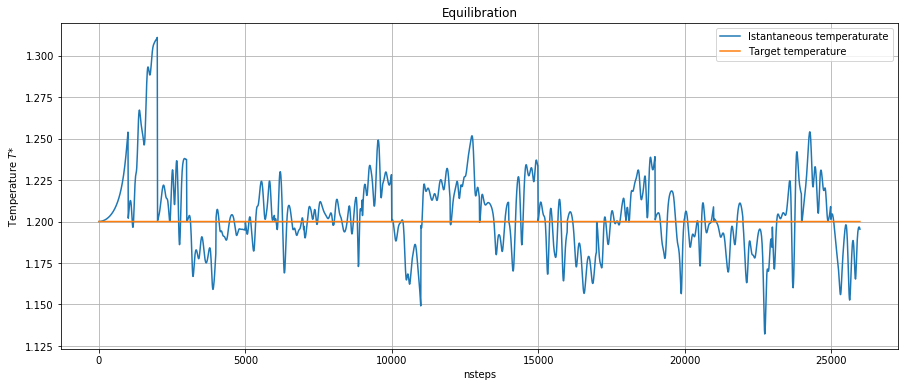

In [9]:
T = np.loadtxt('./Gas/Equi/output_temp.dat', usecols=(0), unpack='true')
b=np.arange(np.size(T))*10
plt.figure(figsize=(15,6))
plt.plot(b,T, label="Istantaneous temperaturate" )
plt.plot(b, 1.2+b-b, label="Target temperature")
plt.xlabel("nsteps")
plt.ylabel("Temperature $T{*}$")
plt.grid(True)
plt.legend()
plt.title("Equilibration")
plt.show()

La condizione di equilibrazione per la fase gassosa avviene in meno step, dato che la temperatura studiata è più alta; si è comunque provato a fare molte ripartenze, osservando come la temperatura, anche dopo 20 $restart$ oscilla ma con uno scarto percetuale dell'ordine del 5%. Si è scelta come condizone iniziale per la ripartenza una condizione con temperatura finale prossima a quella di target.

Si nota, inoltre, che in fase gassosa i "salti" di temperatura nelle prime fasi sono di ordini di grandezza inferiori rispetto alle due fasi precedenti, studiate a temperature più basse: questo perchè a temperature più alte la rottura della struttura cristallina è facilitata dalla maggior quantità di energia termica disponibile.

In [10]:
block, Etot, sigmaEtot = np.loadtxt('./Gas/output_ave_etot.dat', usecols=(0,1,2), unpack='true')
block, Ekin, sigmaEkin = np.loadtxt('./Gas/output_ave_ekin.dat', usecols=(0,1,2), unpack='true')
block, Epot, sigmaEpot = np.loadtxt('./Gas/output_ave_epot.dat', usecols=(0,1,2), unpack='true')
block, temp, sigmatemp = np.loadtxt('./Gas/output_ave_temp.dat', usecols=(0,1,2), unpack='true')
eps_kb=120 #Argon
k=1.380649e-23
eps=eps_kb*k
#SI
temp=temp*eps_kb
sigmatemp=sigmatemp*eps_kb
Etot=Etot*eps
sigmaEtot=sigmaEtot*eps
Ekin=Ekin*eps
sigmaEkin=sigmaEkin*eps
Epot=Epot*eps
sigmaEpot=sigmaEpot*eps

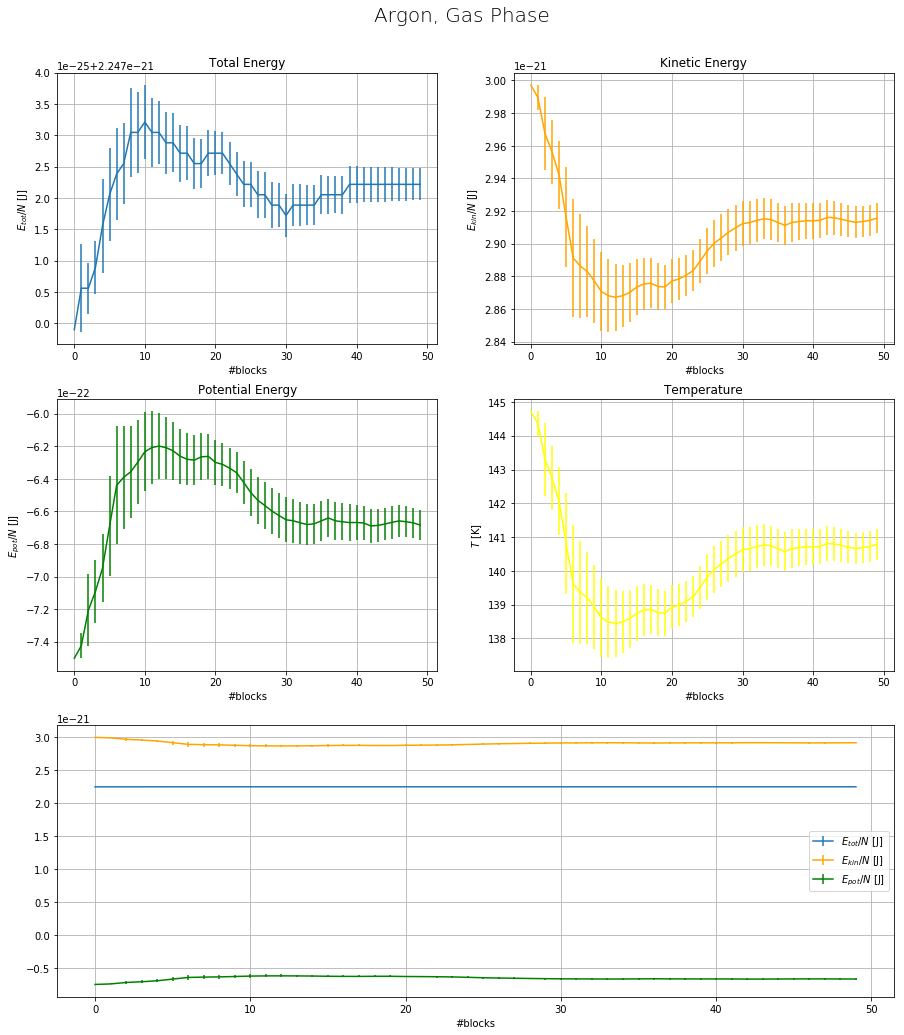

In [11]:
fig = plt.figure(figsize=(15, 23))
fig.suptitle('Argon, Gas Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(4, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plt.errorbar(block,Etot,yerr=sigmaEtot)
plt.xlabel('#blocks')
plt.ylabel('$E_{tot}/N$ [J]')
plt.title ("Total Energy")
plt.grid(True)

ax2 = fig.add_subplot(gs[0, 1])
plt.errorbar(block,Ekin,yerr=sigmaEkin, color="orange")
plt.xlabel('#blocks')
plt.ylabel('$E_{kin}/N$ [J]')
plt.title ("Kinetic Energy")
plt.grid(True)

ax3 = fig.add_subplot(gs[1, 0])
plt.errorbar(block,Epot,yerr=sigmaEpot , color="green")
plt.xlabel('#blocks')
plt.ylabel('$E_{pot}/N$ [J]')
plt.title ("Potential Energy")
plt.grid(True)

ax4 = fig.add_subplot(gs[1, 1])
plt.errorbar(block,temp,yerr=sigmatemp, color="yellow")
plt.xlabel('#blocks')
plt.ylabel('$T$ [K]')
plt.title ("Temperature")
plt.grid(True)

ax5 = fig.add_subplot(gs[2, :])
plt.errorbar(block,Etot,yerr=sigmaEtot, label="$E_{tot}/N$ [J]")
plt.errorbar(block,Ekin,yerr=sigmaEkin, label="$E_{kin}/N$ [J]",  color="orange")
plt.errorbar(block,Epot,yerr=sigmaEpot, label="$E_{pot}/N$ [J]", color="green")
plt.xlabel('#blocks')
ax5.legend()
plt.grid(True)
plt.show()

Il sistema nella fase gassosa non è legato e presenta energia cinetica dominante rispetto a quella gravitazionale.

Nella fase iniziale della simulazione energia cinetica e potenziale variano ma mantenendo costante il valore di energia totale.